The intent of project 1 was data exploration, data characterization, data visualization, identifying data issues, and potentially resolving problems in the data. In project 2, we apply the same techniques as in project 1, but this time we are exploring questions specific to the data. Your proposal will need to include two or more hypotheses about the data you are investigating. 

The questions you pose should not have obvious answers. The questions should have clear answers (yes/no, greater than/less than). The data you choose limits the scope of your questions. If you need multiple data sources to investigate your hypothesis, that is acceptable but not required. The question/answer is not the focus of my grading for the project; instead, the method of investigation you use is what is relevant to the course.

What I care about for the project​:

Challenge: determine relevant scope appropriate to your skills while still pushing your experience​
Reproducibility: A description of research methods can be called "coherent" and "complete" when readers understand the process well enough to replicate it themselves.
Analysis​ should
apply methods learned in class​
Use Python 3 in a Jupyter notebook​. Do not present results in Powerpoint or PDF or Keynote.
Demonstrates process of data science, from gathering data to telling story through characterization ​and analysis
Use a visualization for the data that presents the relevant story

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
wdc_crime = pd.read_csv("https://opendata.arcgis.com/datasets/bda20763840448b58f8383bae800a843_26.csv")
wdc_trees = pd.read_csv("https://opendata.arcgis.com/datasets/f6c3c04113944f23a7993f2e603abaf2_23.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
wdc_crime.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [0]:
wdc_crime_filter = wdc_crime.groupby(['OFFENSE','WARD']).size().reset_index(name="Incidence")

Text(0.5, 1.0, 'Crime by Ward in Washington DC')

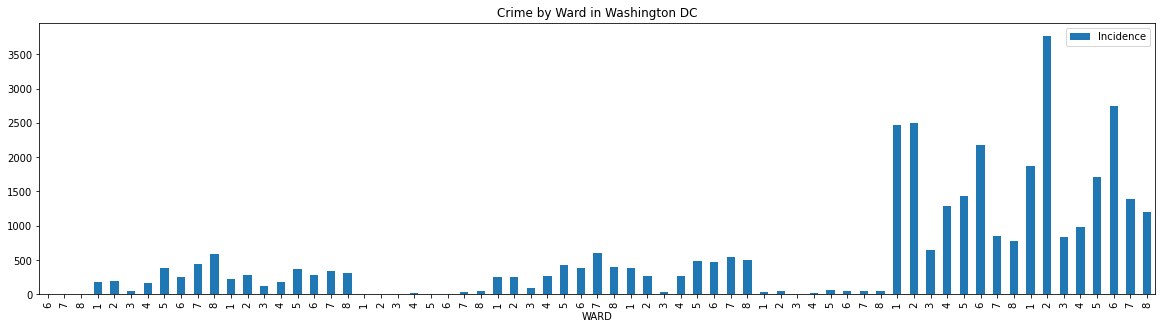

In [0]:
wdc_crime_filter.plot.bar(x='WARD', y={'OFFENSE','Incidence'}, figsize=(20,5)).set_title('Crime by Ward in Washington DC')

In [0]:
wdc_trees.columns

Index(['X', 'Y', 'OBJECTID', 'FACILITYID', 'VICINITY', 'WARD', 'TBOX_L',
       'TBOX_W', 'WIRES', 'CURB', 'SIDEWALK', 'TBOX_STAT', 'RETIREDDT',
       'SCI_NM', 'CMMN_NM', 'DATE_PLANT', 'DBH', 'DISEASE', 'PESTS',
       'CONDITION', 'CONDITIODT', 'OWNERSHIP', 'TREE_NOTES', 'ONEYEARPHOTO',
       'SPECIALPHOTO', 'PHOTOREMARKS', 'ELEVATION', 'SIGN', 'TRRS', 'WARRANTY',
       'FAM_NAME', 'CREATED_USER', 'CREATED_DATE', 'EDITEDBY',
       'LAST_EDITED_USER', 'LAST_EDITED_DATE', 'GENUS_NAME', 'GLOBALID'],
      dtype='object')

In [0]:
wdc_tree_filter = wdc_trees.groupby(['WARD']).size().reset_index(name='Trees')

In [0]:
wdc_tree_filter.head(14)

,WARD,Incidence
0,0.0,1
1,1.0,11216
2,2.0,17784
3,3.0,30832
4,4.0,30223
5,5.0,27763
6,6.0,26151
7,7.0,27583
8,8.0,19149
9,9.0,2


In [0]:
wdc_crime_filter

,OFFENSE,WARD,Incidence
0,ARSON,6,2
1,ARSON,7,1
2,ARSON,8,3
3,ASSAULT W/DANGEROUS WEAPON,1,183
4,ASSAULT W/DANGEROUS WEAPON,2,190
...,...,...,...
62,THEFT/OTHER,4,988
63,THEFT/OTHER,5,1716
64,THEFT/OTHER,6,2747
65,THEFT/OTHER,7,1389


In [0]:
wdc_totals = pd.merge(wdc_crime_filter, wdc_tree_filter, on='WARD')

In [0]:
wdc_totals = wdc_totals.groupby(['OFFENSE','CMMN_NM']).size().reset_index(name='Incidence')

In [0]:
wdc_totals.head(50)

,OFFENSE,WARD,Incidence,Trees
0,ARSON,6,2,26151
1,ASSAULT W/DANGEROUS WEAPON,6,257,26151
2,BURGLARY,6,282,26151
3,HOMICIDE,6,13,26151
4,MOTOR VEHICLE THEFT,6,386,26151
5,ROBBERY,6,469,26151
6,SEX ABUSE,6,48,26151
7,THEFT F/AUTO,6,2178,26151
8,THEFT/OTHER,6,2747,26151
9,ARSON,7,1,27583
